In [1]:
import os
import sys
import pandas
import numpy as np
import json
from keras import optimizers
from keras.utils import np_utils
from google.colab import drive
from keras.callbacks import LearningRateScheduler
from keras.models import  Sequential
from keras.layers import  Embedding, Dense, Activation, Conv1D, GlobalAveragePooling1D, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
drive.mount('/content/gdrive/')

root_path = '/content/gdrive/My Drive/Colab Notebooks/nn-homework1/amazon'
sys.path.append(root_path)

dictionary_path = os.path.join(root_path, '/dictionary.json')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
train = pandas.read_csv(os.path.join(root_path, 'amazon.csv')).values

1


In [0]:
x_raw = train[:, 9]
y_raw = train[:, 10]

# x_raw = np.array(x_raw)
# y_raw = np.array(y_raw)

In [0]:
dictionary = {}
j = 1
for i in range(len(x_raw)):
  sentence = x_raw[i].split(" ")
  for word in sentence:
    if not word in dictionary.keys():
      dictionary[word] = j
      j += 1

In [0]:
with open(dictionary_path, 'w') as f:
  f.write(json.dumps(dictionary))

In [0]:
with open(dictionary_path, 'r') as f:
  dictionary = json.loads(f.read())

In [0]:
x_raw_indexed = np.zeros((len(x_raw), 500))
for i in range(len(x_raw)):
  sliced_array = np.array(list(map(lambda x: dictionary[x], x_raw[i].split(" "))))[:500]
  x_raw_indexed[i] = np.pad(sliced_array, (0, 500 - len(sliced_array)), 'constant')
  
x_raw_indexed = np.array(x_raw_indexed)
y_raw = np.array(y_raw)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_raw_indexed, y_raw, test_size = .2)
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

In [0]:
# hyper parameters
epochs = 10
batch_size = 32
learning_rate = 0.01
momentum = 0.5
decay = 0.5

In [18]:
sgd = optimizers.SGD(lr=learning_rate, momentum=momentum)
scheduler = LearningRateScheduler(
    lambda epoch: learning_rate * 1/(1 + decay * epoch)
)

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model = Sequential()

model.add(Embedding(output_dim = 100, input_dim=len(dictionary) + 1))

model.add(Conv1D(64, 3))
model.add(Activation('relu'))

model.add(Conv1D(32, 3))
model.add(Activation('relu'))

model.add(Conv1D(16, 3))
model.add(Activation('relu'))

model.add(GlobalAveragePooling1D())

model.add(Dense(12))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(
    loss="binary_crossentropy",
    optimizer=sgd,
    metrics=['accuracy'],
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         14220300  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          19264     
_________________________________________________________________
activation_1 (Activation)    (None, None, 64)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          6176      
_________________________________________________________________
activation_2 (Activation)    (None, None, 32)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 16)          1552      
_________________________________________________________________
activation_3 (Activation)    (None, None, 16)          0         
__________

In [20]:
history = model.fit(
    x_train, y_train,
    batch_size = batch_size, epochs = epochs,
    validation_data = (x_test, y_test),
    callbacks=[scheduler]
)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 31s 779us/step - loss: 0.4515 - acc: 0.8349 - val_loss: 0.4442 - val_acc: 0.8371
Epoch 2/10
40000/40000 [==============================] - 28s 694us/step - loss: 0.4457 - acc: 0.8354 - val_loss: 0.4434 - val_acc: 0.8371
Epoch 3/10
40000/40000 [==============================] - 28s 697us/step - loss: 0.4456 - acc: 0.8354 - val_loss: 0.4434 - val_acc: 0.8371
Epoch 4/10
40000/40000 [==============================] - 28s 688us/step - loss: 0.4455 - acc: 0.8354 - val_loss: 0.4433 - val_acc: 0.8371
Epoch 5/10
40000/40000 [==============================] - 28s 697us/step - loss: 0.4454 - acc: 0.8354 - val_loss: 0.4433 - val_acc: 0.8371
Epoch 6/10
40000/40000 [==============================] - 28s 692us/step - loss: 0.4453 - acc: 0.8354 - val_loss: 0.4433 - val_acc: 0.8371
Epoch 7/10
40000/40000 [==============================] - 28s 693us/

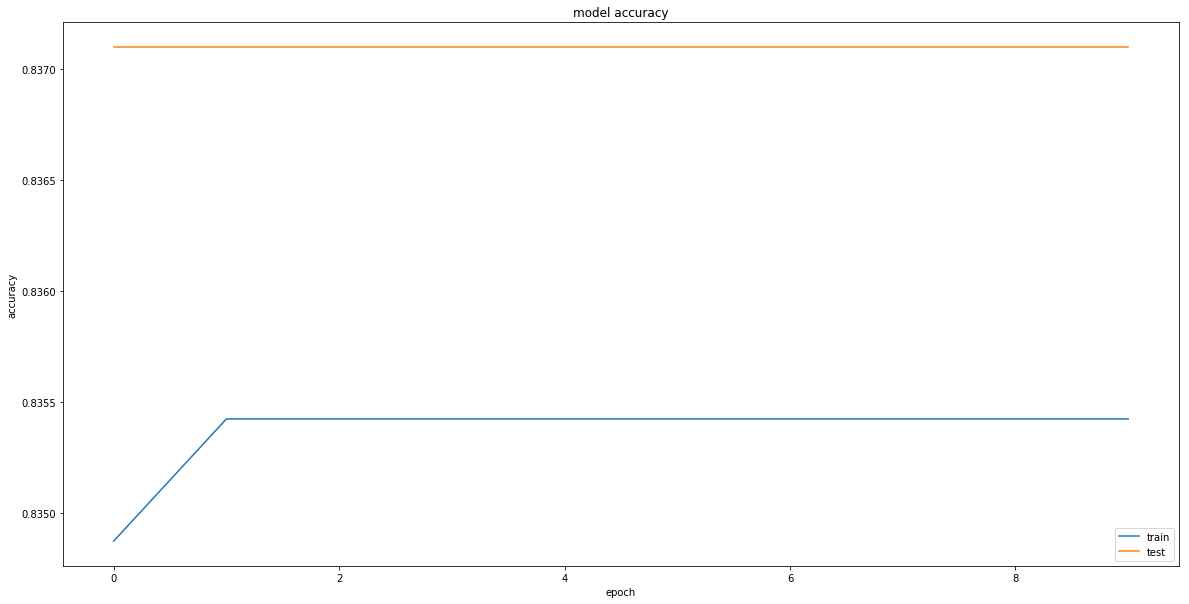

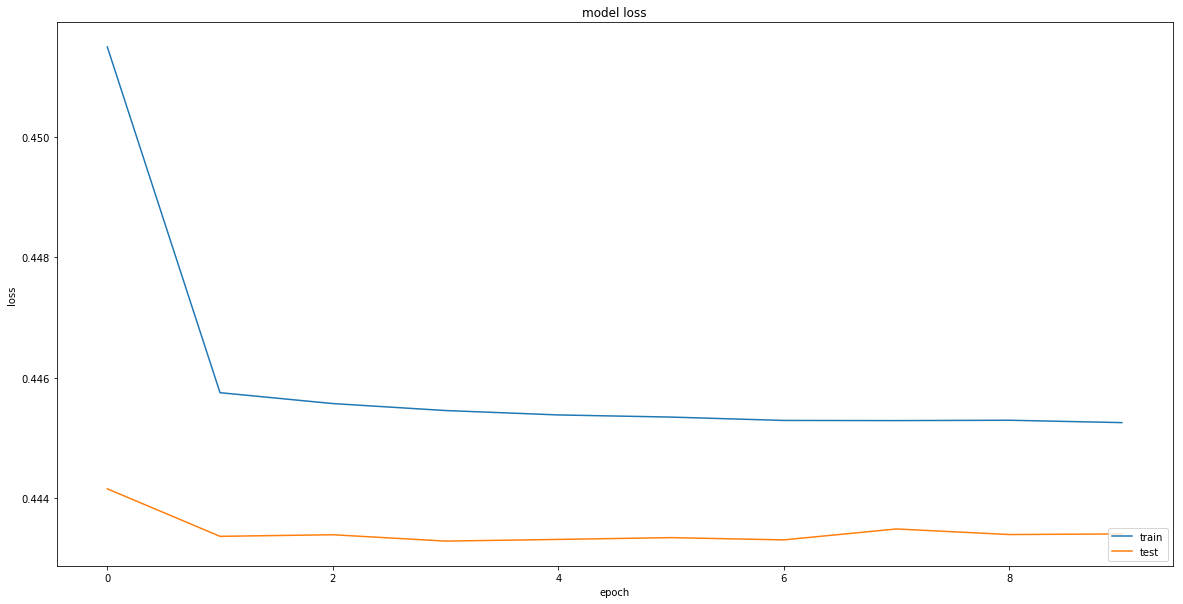

In [22]:
#  plot accuracy
plt.figure(figsize=(20, 10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(
    [
        'train', 'test',
    ],
    loc='lower right')

plt.show()

#  plot accuracy
plt.figure(figsize=(20, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(
    [
        'train', 'test',
    ],
    loc='lower right')

plt.show()


In [23]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('accuracy:', scores[1] * 100)

accuracy: 83.71
